The purpose of this exercise is to get you more familiar with the Central Limit Theorem (CLT), and how it works with real values. Recall that the CLT states:

Let $X_1, X_2, \dots, X_n$ be random variables from some distribution with mean $\mu$ and variance $\sigma^2$. Then  $\bar{X}=\frac{1}{n} \sum_{i=1}^n X_i$ will be approximately normally distributed and $\frac{\bar{X}-\mu}{\sigma / \sqrt{n}} \sim N(0, 1)$. Let's take a closer took at what that means for a sampling distribution.

Start by executing the following code cell to generate $5000$ samples from a [Weibull](https://en.wikipedia.org/wiki/Weibull_distribution) distribution, save them as `data`, and plot a histogram of the values. For the remainder of this notebook, this will be our underlying population distribution.

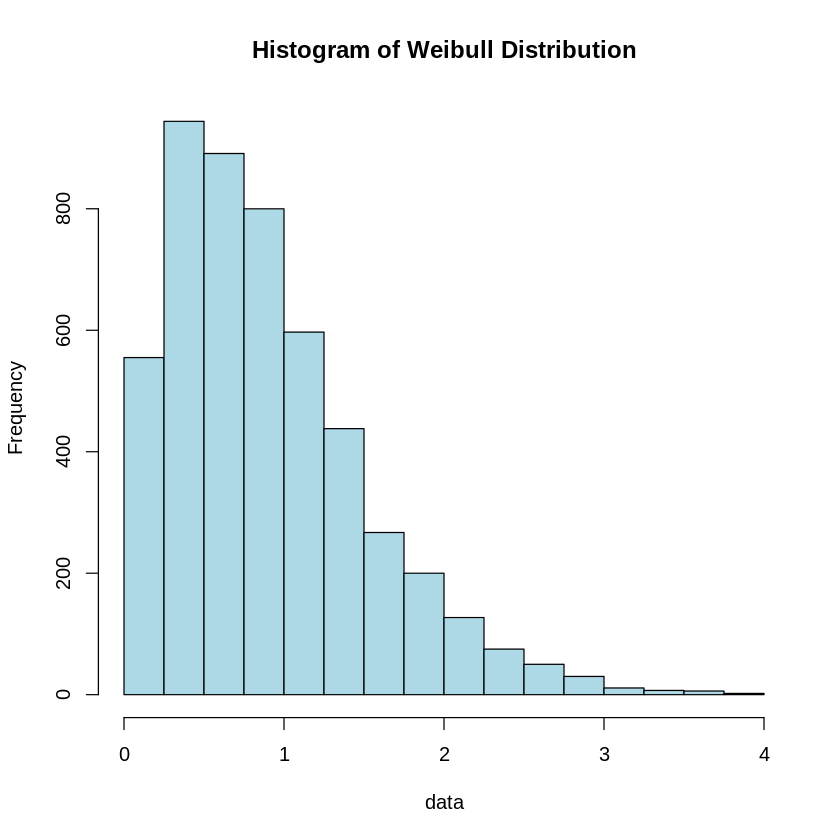

In [22]:
# Set seed for reproducibility
set.seed(12345)

# Generate 5000 samples from a Weibull distribution
data <- rweibull(5000, shape = 1.5, scale = 1)

# Plot a histogram of the values
breaks <- seq(0, 4, 0.25)
hist(data, breaks = breaks, main = "Histogram of Weibull Distribution", col = "lightblue")

Does this distribution look particularly normal? No, it has a long right tail and seems to have a hard cutoff at $x=0$. Let's see how this impacts the CLT.

But first, what is the population mean? Use the `mean()` function to find out.

In [23]:
# Find the population mean
pop_mean <- mean(data)
cat("Population mean:", pop_mean, "\n")


Population mean: 0.9028325 


In reality, we won't know the underlying population's distribution. The best we can do is pull a sample from the population and test that. However, that leads to some questions like:
* Is the sample mean a good estimate for the population mean?
* How many samples do I need for my sample mean to be a good estimate of the population mean?

Those are some of the questions we're going to answer. Finish the function below to return the mean of $n$ sample points from the data. That is, call `sample(data, n)` to generate $n$ samples from the population, then call `mean()` on those samples.

In [24]:
# Function to return the mean of n sample points from the data
sample.mean <- function(data, n){
  samples <- sample(data, n)      # Sample n datapoints from the population
  return(mean(samples))           # Return the mean of those n samples
}


Using the function you just defined, generate the mean of a sample with a sample size $n=5$. Is it a good approximation of the population mean?

In [25]:
# Generate the mean of a sample with a sample size n = 5
sample_mean_5 <- sample.mean(data, 5)
cat("Sample mean with n=5:", sample_mean_5, "\n")


Sample mean with n=5: 1.064313 


Notice that the sample mean $\bar{X}$ is a random variable, and will produce a different value each time we call `sample.mean()`. That means $\bar{X}$ has some distribution, which we can observe by generating many independent samples and plotting a histogram of the values.

To do this, we can use the `replicate()` function, which allows us to call a function multiple times and create a vector containing all the results. Try `replicate(3, sample.mean(data, 5))` to create a vector of 3 sample means.

In [26]:
# Function to return the mean of n sample points from the data
sample.mean <- function(data, n){
  samples <- sample(data, n)      # Sample n datapoints from the population
  return(mean(samples))           # Return the mean of those n samples
}

Generate 3 different vectors of sample means of sizes 10, 100 and 1000 respectively. For now, keep the sample size as $n=5$ for all the vectors. Plot your results with histograms. Note that it may be helpful to have a fixed x-axis, so you can see how the histograms compare on the same scale. To do this, include `xlim=c(0,2)` as a parameter in your call to `hist()`. What do you notice?

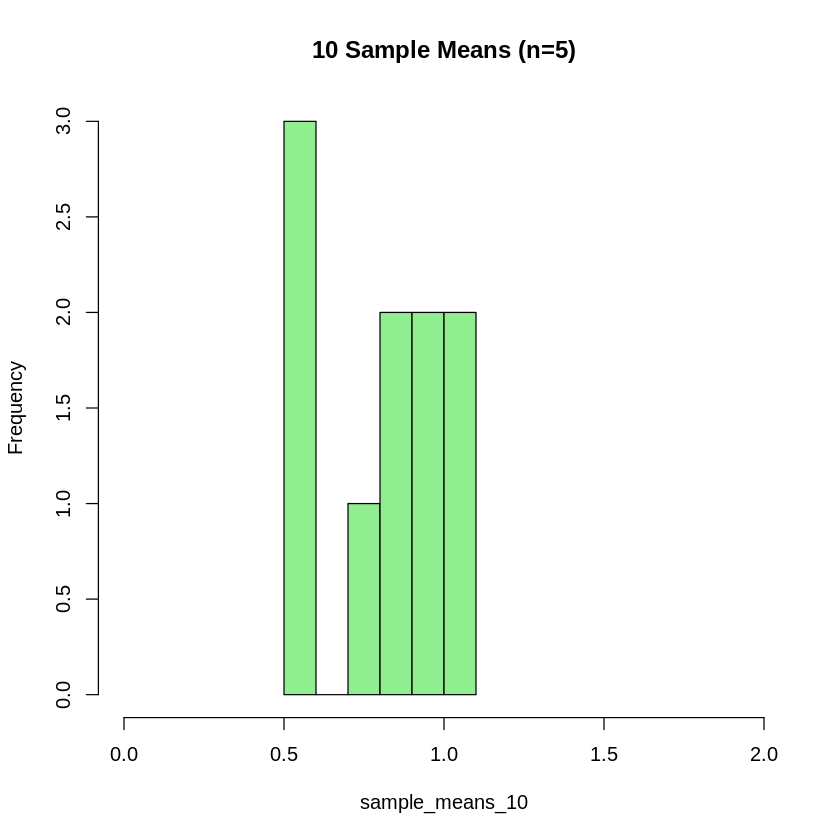

In [27]:
# Generate 10 sample means with n=5 and plot the results
# Generate 10 sample means with n=5 and plot the results
sample_means_10 <- replicate(10, sample.mean(data, 5))
hist(sample_means_10, xlim=c(0,2), main="10 Sample Means (n=5)", col="lightgreen")


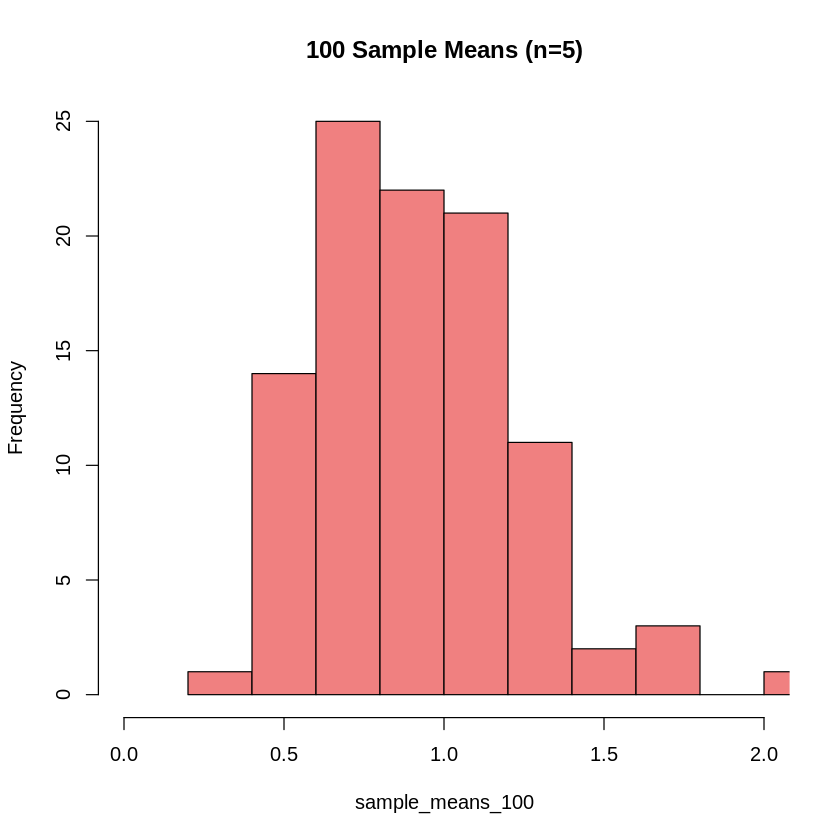

In [28]:
# Generate 100 sample means with n=5 and plot the results
# Generate 100 sample means with n=5 and plot the results
sample_means_100 <- replicate(100, sample.mean(data, 5))
hist(sample_means_100, xlim=c(0,2), main="100 Sample Means (n=5)", col="lightcoral")


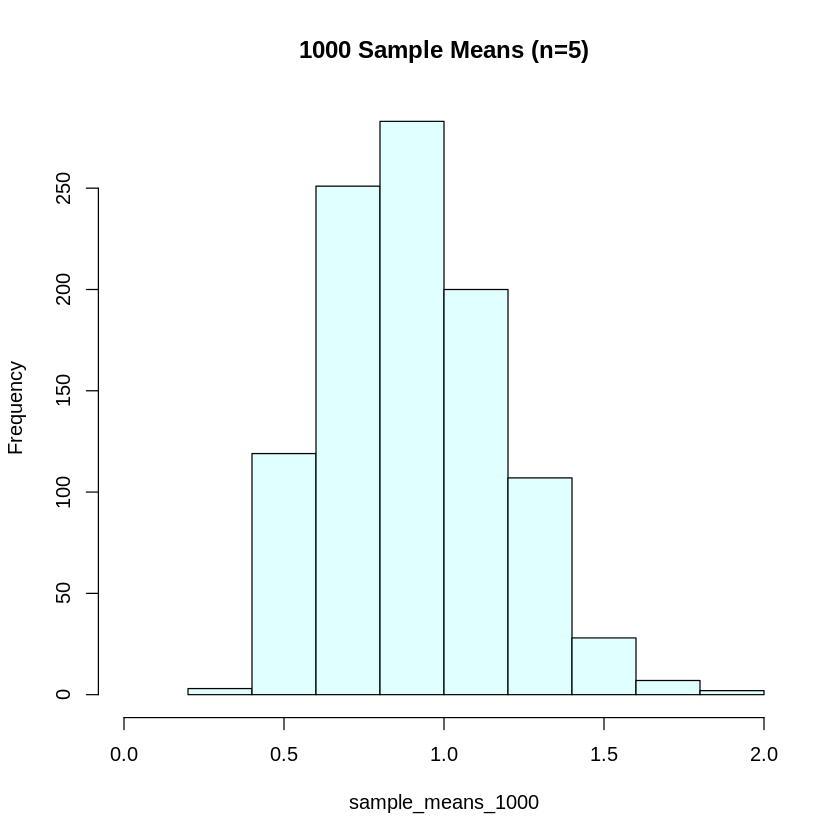

In [29]:
# Generate 1000 sample means with n=5 and plot the results
# Generate 1000 sample means with n=5 and plot the results
sample_means_1000 <- replicate(1000, sample.mean(data, 5))
hist(sample_means_1000, xlim=c(0,2), main="1000 Sample Means (n=5)", col="lightcyan")


Now change the sample size and see how that affects the results. Generate 3 vectors of 100 samples means, coming from samples of sample sizes 5, 50, and 500. Plot your results. Again, it may be helpful to have a set x-limit on your histograms. What do you notice?

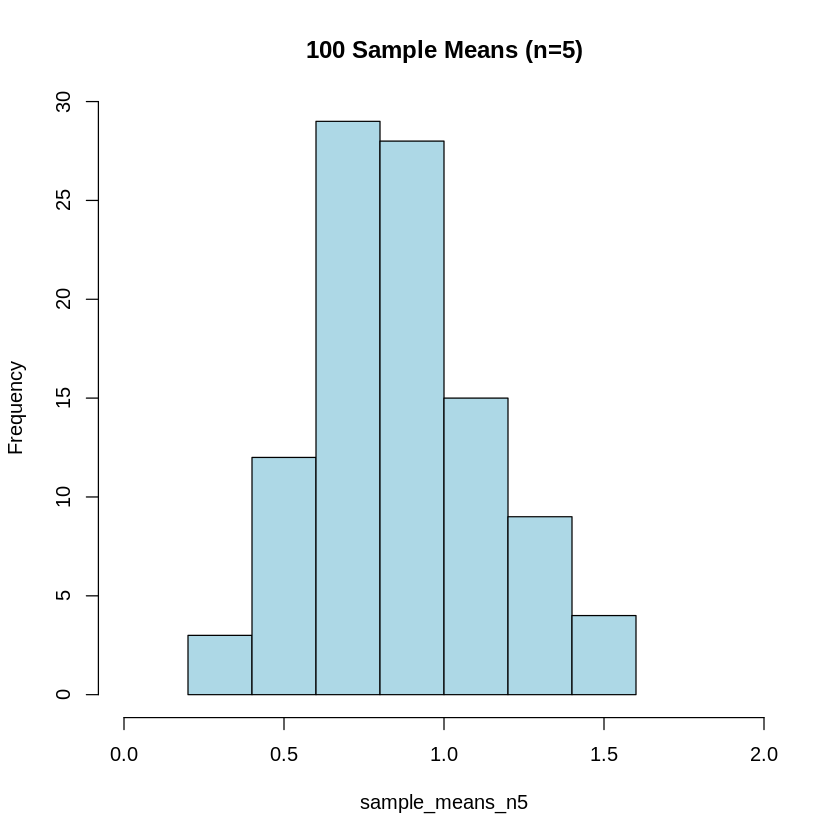

In [30]:
# Generate 100 sample means with n=5 and plot the results
# Generate 100 sample means with n=5 and plot the results
sample_means_n5 <- replicate(100, sample.mean(data, 5))
hist(sample_means_n5, xlim=c(0,2), main="100 Sample Means (n=5)", col="lightblue")


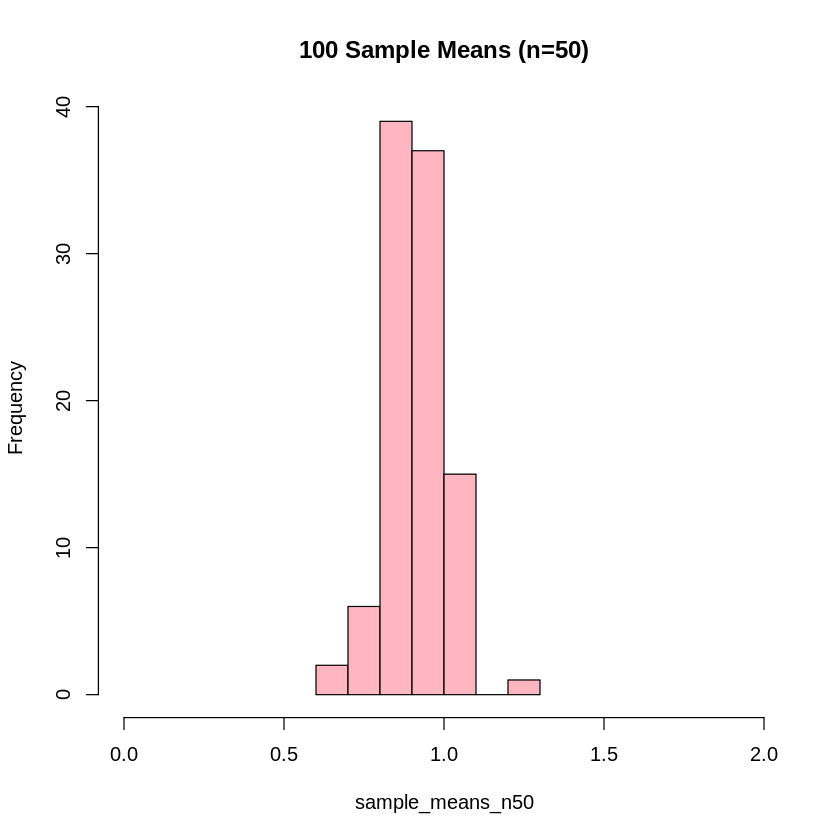

In [31]:
# Generate 100 sample means with n=50 and plot the results
# Generate 100 sample means with n=50 and plot the results
sample_means_n50 <- replicate(100, sample.mean(data, 50))
hist(sample_means_n50, xlim=c(0,2), main="100 Sample Means (n=50)", col="lightpink")


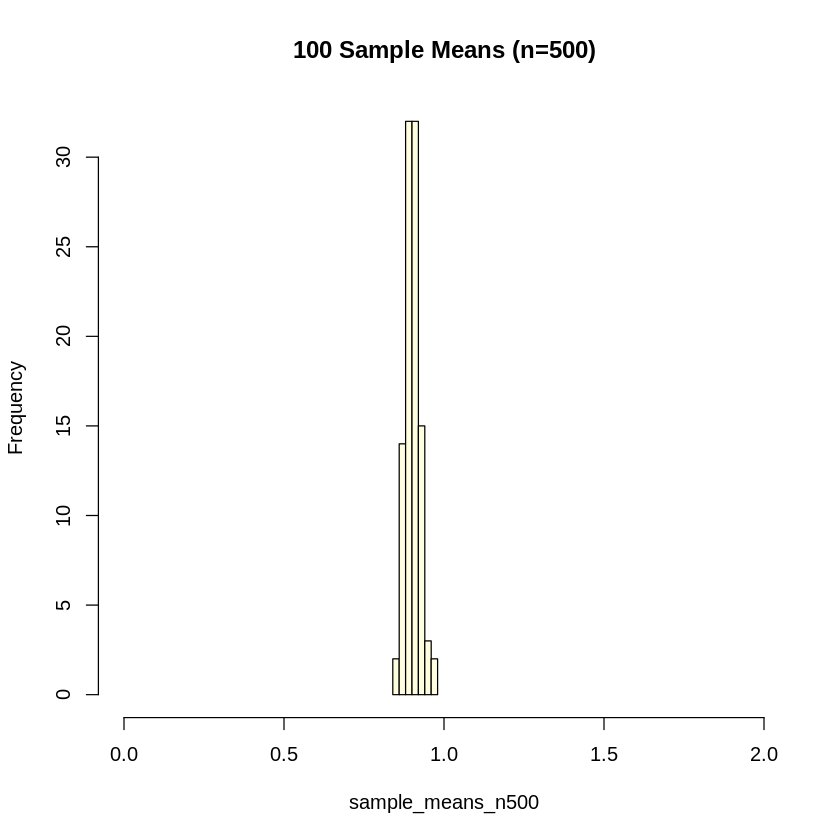

In [32]:
# Generate 100 sample means with n=500 and plot the results
# Generate 100 sample means with n=500 and plot the results
sample_means_n500 <- replicate(100, sample.mean(data, 500))
hist(sample_means_n500, xlim=c(0,2), main="100 Sample Means (n=500)", col="lightyellow")


The important things to notice are:
* The distribution of $\bar{X}$ is approximately normally distributed, even though our underlying population is not normal.
* The mean of the sample distribution is about $0.9$, which is approximately the same as the mean for the population distribution.
* The variance of the sample distribution decreases as the sample size increases.

These ideas are the Central Limit Theorem!

In [33]:
print('Thank you for stopping by! ')

[1] "Thank you for stopping by! "


In [34]:
print('By Sulay, University of Colorado Boulder')

[1] "By Sulay, University of Colorado Boulder"
